In [1]:
import pandas as pd
import os
import numpy as np
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from pylab import *

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


In [2]:
unknown_file_list = ['glassunknown.csv',
 'penunknown.csv',
 'letterunknown.csv',
 'satimageunknown.csv',
 'yeastunknown.csv',
 'optunknown.csv',
 'ecoliunknown.csv',
 'vehunknown.csv',
 'pageunknown.csv']

unknown_dm_file_list = [
    'glass_onehone_plotcdfv2dm_unknown.csv',
    'pen_onehone_plotcdfv2dm_unknown.csv',
    'letter_onehone_plotcdfv2dm_unknown.csv',
    'satimage_onehone_plotcdfv2dm_unknown.csv',
    'yeast_onehone_plotcdfv2dm_unknown.csv',
    'opt_onehone_plotcdfv2dm_unknown.csv',
 'ecoli_onehone_plotcdfv2dm_unknown.csv',
 'veh_onehone_plotcdfv2dm_unknown.csv',
 'page_onehone_plotcdfv2dm_unknown.csv',
 ]

In [3]:
dm_file_list = [
    'glass_onehone_plotcdfv2.csv',
    'pen_onehone_plotcdfv2.csv',
    'letter_onehone_plotcdfv2.csv',
    'satimage_onehone_plotcdfv2.csv',
    'yeast_onehone_plotcdfv2.csv',
    'veh_onehone_plotcdfv2.csv',
    'opt_onehone_plotcdfv2.csv',
     'ecoli_onehone_plotcdfv2.csv',
     'veh_onehone_plotcdfv2.csv',
     'page_onehone_plotcdfv2.csv',
 ]

file_list = [
     'glass.csv',
    'pen.csv',
    'letter.csv',
    'satimage.csv',
    'yeast.csv',
    'veh.csv',
     'opt.csv',
     'ecoli.csv',
     'page.csv',
]
dataname = ['glass','pendigits','letter','satimage','yeast','vehicle','optdigits','ecoli','pageblock']


In [4]:
path = 'cdf_result/'
xx = [0,0.1,0.2,0.7,0.9,1]
yy = [0,0,0,0,0,0,]

In [7]:
def plot_ps(index,iflegend = False):
    markevery_s = 30
    import seaborn as sns
    pallete = sns.color_palette()

    plt.style.use('seaborn-whitegrid')
    #plt.style.use('seaborn-white')

    fig, ax = plt.subplots(figsize = (32, 5))
    # fig = plt.figure(figsize=(8,5))
    # plt.subplot(1, 2, 1)
    # fig = plt.figure(figsize=(8,5))
    # fig, (axes1, axes2) = plt.subplots(1, 2, figsize=(8, 5))
    fig2=plt.subplot(141)

    for i in range(1):

    #     file_list = os.listdir(path)
    #     file_list = [file_list[i]]
        print(file_list)

        dm_list = []
        dmdr_list = []
        sndmdr_list = []
        robust_list = []
        triple_list = []
        sntriple_list = []
        snips_list = []
        min_robust_list = []
        min_dmrobust_list = []

        for file in file_list:

            data = pd.read_csv(path + file)

            snips = list(data.iloc[1,:])[2:]
            dm = list(data.iloc[2,:])[2:]
            dmdr = list(data.iloc[3,:])[2:]
            sndmdr = list(data.iloc[4,:])[2:]
            robust = list(data.iloc[5,:])[2:]
            triple = list(data.iloc[6,:])[2:]
            sntriple = list(data.iloc[7,:])[2:]
            
            sntriple_w = np.array(dm)/np.array(snips)
            dm_list += list(sntriple_w)

            sntriple_w = np.array(dmdr)/np.array(snips)
            dmdr_list += list(sntriple_w)

            sntriple_w = np.array(sndmdr)/np.array(snips)
            sndmdr_list += list(sntriple_w)

            sntriple_w = np.array(robust)/np.array(snips)
            robust_list += list(sntriple_w)

            sntriple_w = np.array(triple)/np.array(snips)
            triple_list += list(sntriple_w)

            sntriple_w = np.array(sntriple)/np.array(snips)
            sntriple_list += list(sntriple_w)

            sntriple_w = np.array(snips)/np.array(snips)
            snips_list += list(sntriple_w)

            triple1 = np.array(triple).reshape(len(triple),1)
            robust1 = np.array(robust).reshape(len(triple),1)
            sntriple1 = np.array(sntriple).reshape(len(triple),1)
            c = np.concatenate((triple1,robust1,sntriple1),axis = 1)
            c = np.min(c,axis = 1)
            sntriple_w = c/np.array(snips)
            min_robust_list += list(sntriple_w)

            triple1 = np.array(dm).reshape(len(triple),1)
            robust1 = np.array(dmdr).reshape(len(triple),1)
            sntriple1 = np.array(sndmdr).reshape(len(triple),1)
            c = np.concatenate((triple1,robust1,sntriple1),axis = 1)
            c = np.min(c,axis = 1)
            sntriple_w = c/np.array(snips)
            min_dmrobust_list += list(sntriple_w)

        dm_list.sort()
        dmdr_list.sort()
        sndmdr_list.sort()
        robust_list.sort()
        triple_list.sort()
        sntriple_list.sort()
        snips_list.sort()
        min_robust_list.sort()
        min_dmrobust_list.sort()


        y = []
        for i in range(len(sntriple_list)):
            y.append((i+1)/len(sntriple_list))
        dm0_list = []
        dr_list = []
        sndr_list = []
        min_dm_list = []
        for f in dm_file_list:
            data = pd.read_csv('tune/' + f)
            snips = list(data.iloc[1,:])[2:]
            dm = list(data.iloc[2,:])[2:]
            dr = list(data.iloc[3,:])[2:]
            sndr = list(data.iloc[4,:])[2:]


            sntriple_w = np.array(dm)/np.array(snips)
            dm0_list += list(sntriple_w)

            sntriple_w = np.array(dr)/np.array(snips)
            dr_list += list(sntriple_w)

            sntriple_w = np.array(sndr)/np.array(snips)
            sndr_list += list(sntriple_w)

            triple1 = np.array(dm).reshape(len(dm),1)
            robust1 = np.array(dr).reshape(len(dm),1)
            sntriple1 = np.array(sndr).reshape(len(dm),1)
            c = np.concatenate((triple1,robust1,sntriple1),axis = 1)
            c = np.min(c,axis = 1)
            sntriple_w = c/np.array(snips)
            min_dm_list += list(sntriple_w)


        dm0_list.sort()
        dr_list.sort()
        sndr_list.sort()
        min_dm_list.sort()
        y_dm = []
        for i in range(len(dm0_list)):
            y_dm.append((i+1)/len(dm0_list))

        _mksize = 8


        plt.plot(xx + snips_list,yy + y,color = 'black',linewidth=2.5,markersize=_mksize)


        plt.plot(min_dm_list,y_dm,marker ='x',markevery=markevery_s,linewidth=2.5,markersize=_mksize,c = 'b')

        plt.plot(min_dmrobust_list,y,marker ='o',markevery=markevery_s,linewidth=2.5,markersize=_mksize,c = 'g')

        plt.plot(min_robust_list,y,marker ='^',markevery=markevery_s,linewidth=2.5,markersize=_mksize,c = 'c')

        plt.xlim((0, 1.5))

        plt.xticks( size = 25)
        plt.yticks( size = 25)

        plt.text(0.25, -0.3,"(a) Logging policy known",fontsize = 25)
        
#         plt.text(0.65, 1.1,dataname,fontsize = 20)

    fig2=plt.subplot(142)
    for i in range(1):



        dm_list = []
        dmdr_list = []
        sndmdr_list = []
        robust_list = []
        triple_list = []
        sntriple_list = []
        snips_list = []
        min_robust_list = []
        min_dmrobust_list = []


        for file in unknown_file_list:

            data = pd.read_csv(path + file)

            snips = list(data.iloc[1,:])[2:]
            dm = list(data.iloc[2,:])[2:]
            dmdr = list(data.iloc[3,:])[2:]
            sndmdr = list(data.iloc[4,:])[2:]
            robust = list(data.iloc[5,:])[2:]
            triple = list(data.iloc[6,:])[2:]
            sntriple = list(data.iloc[7,:])[2:]




            sntriple_w = np.array(dm)/np.array(snips)
            dm_list += list(sntriple_w)

            sntriple_w = np.array(dmdr)/np.array(snips)
            dmdr_list += list(sntriple_w)

            sntriple_w = np.array(sndmdr)/np.array(snips)
            sndmdr_list += list(sntriple_w)

            sntriple_w = np.array(robust)/np.array(snips)
            robust_list += list(sntriple_w)

            sntriple_w = np.array(triple)/np.array(snips)
            triple_list += list(sntriple_w)

            sntriple_w = np.array(sntriple)/np.array(snips)
            sntriple_list += list(sntriple_w)

            sntriple_w = np.array(snips)/np.array(snips)
            snips_list += list(sntriple_w)

            triple1 = np.array(triple).reshape(len(triple),1)
            robust1 = np.array(robust).reshape(len(triple),1)
            sntriple1 = np.array(sntriple).reshape(len(triple),1)
            c = np.concatenate((triple1,robust1,sntriple1),axis = 1)
            c = np.min(c,axis = 1)
            sntriple_w = c/np.array(snips)
            min_robust_list += list(sntriple_w)

            triple1 = np.array(dm).reshape(len(triple),1)
            robust1 = np.array(dmdr).reshape(len(triple),1)
            sntriple1 = np.array(sndmdr).reshape(len(triple),1)
            c = np.concatenate((triple1,robust1,sntriple1),axis = 1)
            c = np.min(c,axis = 1)
            sntriple_w = c/np.array(snips)
            min_dmrobust_list += list(sntriple_w)






        dm_list.sort()
        dmdr_list.sort()
        sndmdr_list.sort()
        robust_list.sort()
        triple_list.sort()
        sntriple_list.sort()
        snips_list.sort()
        min_robust_list.sort()
        min_dmrobust_list.sort()


        y = []
        for i in range(len(sntriple_list)):
            y.append((i+1)/len(sntriple_list))
        dm0_list = []
        dr_list = []
        sndr_list = []
        min_dm_list = []
        for f in unknown_dm_file_list:
            data = pd.read_csv('tune/' + f)
            snips = list(data.iloc[1,:])[2:]
            dm = list(data.iloc[2,:])[2:]
            dr = list(data.iloc[3,:])[2:]
            sndr = list(data.iloc[4,:])[2:]


            sntriple_w = np.array(dm)/np.array(snips)
            dm0_list += list(sntriple_w)

            sntriple_w = np.array(dr)/np.array(snips)
            dr_list += list(sntriple_w)

            sntriple_w = np.array(sndr)/np.array(snips)
            sndr_list += list(sntriple_w)

            triple1 = np.array(dm).reshape(len(dm),1)
            robust1 = np.array(dr).reshape(len(dm),1)
            sntriple1 = np.array(sndr).reshape(len(dm),1)
            c = np.concatenate((triple1,robust1,sntriple1),axis = 1)
            c = np.min(c,axis = 1)
            sntriple_w = c/np.array(snips)
            min_dm_list += list(sntriple_w)


        dm0_list.sort()
        dr_list.sort()
        sndr_list.sort()
        min_dm_list.sort()
        y_dm = []
        for i in range(len(dm0_list)):
            y_dm.append((i+1)/len(dm0_list))




    #     plt.figure(figsize=(8,5))


        lsnips = plt.plot(xx + snips_list,yy + y,c = 'black',linewidth=2.5,markersize=_mksize)
        ldmf = plt.plot(min_dm_list,y_dm,marker ='x',markevery=markevery_s,linewidth=2.5,markersize=_mksize,c = 'b')
        ldmrf = plt.plot(min_dmrobust_list,y,marker ='o',markevery=markevery_s,linewidth=2.5,markersize=_mksize,c = 'g')
        ldmpsf = plt.plot(min_robust_list,y,marker ='^',markevery=markevery_s,linewidth=2.5,markersize=_mksize,c = 'c')

        plt.xlim((0, 1.5))

        plt.xticks( size = 25)
        plt.yticks( size = 25)
    #     plt.text(0.22, -0.3,"relative MSE w.r.t SnIPS",fontsize = 25)
        plt.text(0.15, -0.3,"(b) Logging policy unknown",fontsize = 25)
        plt.text(-0.9, -0.45,"Comparison Between Families",fontsize = 25)



#         plt.text(0.65, 1.1,dataname,fontsize = 20)
        if iflegend == True:
            legend1 = plt.legend([lsnips[0], ldmf[0], ldmrf[0], ldmpsf[0]],\
                                 ['SnIPS','DM family','DM(R) family','DM-PS family' ], bbox_to_anchor=(-0.2, -0.5) ,borderaxespad = 0., loc=8,ncol=4,fontsize=15,framealpha = 0)
            plt.gca().add_artist(legend1)

    fig2=plt.subplot(143)

    for i in range(1):


        dm_list = []
        dmdr_list = []
        sndmdr_list = []
        robust_list = []
        triple_list = []
        sntriple_list = []
        snips_list = []
        min_robust_list = []
        min_dmrobust_list = []


        for file in file_list:

            data = pd.read_csv(path + file)

            snips = list(data.iloc[1,:])[2:]
            dm = list(data.iloc[2,:])[2:]
            dmdr = list(data.iloc[3,:])[2:]
            sndmdr = list(data.iloc[4,:])[2:]
            robust = list(data.iloc[5,:])[2:]
            triple = list(data.iloc[6,:])[2:]
            sntriple = list(data.iloc[7,:])[2:]

    #         print(np.array(snips))



            sntriple_w = np.array(dm)/np.array(snips)
            dm_list += list(sntriple_w)

            sntriple_w = np.array(dmdr)/np.array(snips)
            dmdr_list += list(sntriple_w)

            sntriple_w = np.array(sndmdr)/np.array(snips)
            sndmdr_list += list(sntriple_w)

            sntriple_w = np.array(robust)/np.array(snips)
            robust_list += list(sntriple_w)

            sntriple_w = np.array(triple)/np.array(snips)
            triple_list += list(sntriple_w)

            sntriple_w = np.array(sntriple)/np.array(snips)
            sntriple_list += list(sntriple_w)

            sntriple_w = np.array(snips)/np.array(snips)
            snips_list += list(sntriple_w)

            triple1 = np.array(triple).reshape(len(triple),1)
            robust1 = np.array(robust).reshape(len(triple),1)
            sntriple1 = np.array(sntriple).reshape(len(triple),1)
            c = np.concatenate((triple1,robust1,sntriple1),axis = 1)
            c = np.min(c,axis = 1)
            sntriple_w = c/np.array(snips)
            min_robust_list += list(sntriple_w)

            triple1 = np.array(dm).reshape(len(triple),1)
            robust1 = np.array(dmdr).reshape(len(triple),1)
            sntriple1 = np.array(sndmdr).reshape(len(triple),1)
            c = np.concatenate((triple1,robust1,sntriple1),axis = 1)
            c = np.min(c,axis = 1)
            sntriple_w = c/np.array(snips)
            min_dmrobust_list += list(sntriple_w)






        dm_list.sort()
        dmdr_list.sort()
        sndmdr_list.sort()
        robust_list.sort()
        triple_list.sort()
        sntriple_list.sort()
        snips_list.sort()
        min_robust_list.sort()
        min_dmrobust_list.sort()


        y = []
        for i in range(len(sntriple_list)):
            y.append((i+1)/len(sntriple_list))
        dm0_list = []
        dr_list = []
        sndr_list = []
        min_dm_list = []
        for f in dm_file_list:
            data = pd.read_csv('tune/' + f)
            snips = list(data.iloc[1,:])[2:]
            dm = list(data.iloc[2,:])[2:]
            dr = list(data.iloc[3,:])[2:]
            sndr = list(data.iloc[4,:])[2:]


            sntriple_w = np.array(dm)/np.array(snips)
            dm0_list += list(sntriple_w)

            sntriple_w = np.array(dr)/np.array(snips)
            dr_list += list(sntriple_w)

            sntriple_w = np.array(sndr)/np.array(snips)
            sndr_list += list(sntriple_w)

            triple1 = np.array(dm).reshape(len(dm),1)
            robust1 = np.array(dr).reshape(len(dm),1)
            sntriple1 = np.array(sndr).reshape(len(dm),1)
            c = np.concatenate((triple1,robust1,sntriple1),axis = 1)
            c = np.min(c,axis = 1)
            sntriple_w = c/np.array(snips)
            min_dm_list += list(sntriple_w)


        dm0_list.sort()
        dr_list.sort()
        sndr_list.sort()
        min_dm_list.sort()
        y_dm = []
        for i in range(len(dm0_list)):
            y_dm.append((i+1)/len(dm0_list))




    #     plt.figure(figsize=(8,5))

        _mksize = 8


        plt.plot(xx + snips_list,yy + y,color = 'black',linewidth=2.5,markersize=_mksize)



        ldm = plt.plot(dm0_list,y_dm,marker ='H',markevery=markevery_s,linewidth=2.5,markersize=_mksize,c = 'gray')
        lsndr = plt.plot(np.array(sndr_list),y_dm,marker ='4',markevery=markevery_s,linewidth=2.5,markersize=_mksize,c = 'tomato')

        ldmr = plt.plot(dm_list,y,marker ='+',markevery=markevery_s,linewidth=2.5,markersize=_mksize,c = 'olive')
        lsndrr = plt.plot(np.array(sndmdr_list),y,marker ='d',markevery=markevery_s,linewidth=2.5,markersize=_mksize,c = 'navy')

        ldmps = plt.plot(robust_list,y,marker ='p',markevery=markevery_s,linewidth=2.5,markersize=_mksize,c = 'teal')
        lsndrps = plt.plot(sntriple_list,y,marker ='v',markevery=markevery_s,linewidth=2.5,markersize=_mksize,c ='purple')


        plt.xlim((0, 1.5))

        plt.xticks( size = 25)
        plt.yticks( size = 25)
        plt.text(0.25, -0.3,"(c) Logging policy known",fontsize = 25)
#         plt.text(0.65, 1.1,dataname,fontsize = 20)


    fig2=plt.subplot(144)
    for i in range(1):



        dm_list = []
        dmdr_list = []
        sndmdr_list = []
        robust_list = []
        triple_list = []
        sntriple_list = []
        snips_list = []
        min_robust_list = []
        min_dmrobust_list = []


        for file in unknown_file_list:

            data = pd.read_csv(path + file)

            snips = list(data.iloc[1,:])[2:]
            dm = list(data.iloc[2,:])[2:]
            dmdr = list(data.iloc[3,:])[2:]
            sndmdr = list(data.iloc[4,:])[2:]
            robust = list(data.iloc[5,:])[2:]
            triple = list(data.iloc[6,:])[2:]
            sntriple = list(data.iloc[7,:])[2:]




            sntriple_w = np.array(dm)/np.array(snips)
            dm_list += list(sntriple_w)

            sntriple_w = np.array(dmdr)/np.array(snips)
            dmdr_list += list(sntriple_w)

            sntriple_w = np.array(sndmdr)/np.array(snips)
            sndmdr_list += list(sntriple_w)

            sntriple_w = np.array(robust)/np.array(snips)
            robust_list += list(sntriple_w)

            sntriple_w = np.array(triple)/np.array(snips)
            triple_list += list(sntriple_w)

            sntriple_w = np.array(sntriple)/np.array(snips)
            sntriple_list += list(sntriple_w)

            sntriple_w = np.array(snips)/np.array(snips)
            snips_list += list(sntriple_w)

            triple1 = np.array(triple).reshape(len(triple),1)
            robust1 = np.array(robust).reshape(len(triple),1)
            sntriple1 = np.array(sntriple).reshape(len(triple),1)
            c = np.concatenate((triple1,robust1,sntriple1),axis = 1)
            c = np.min(c,axis = 1)
            sntriple_w = c/np.array(snips)
            min_robust_list += list(sntriple_w)

            triple1 = np.array(dm).reshape(len(triple),1)
            robust1 = np.array(dmdr).reshape(len(triple),1)
            sntriple1 = np.array(sndmdr).reshape(len(triple),1)
            c = np.concatenate((triple1,robust1,sntriple1),axis = 1)
            c = np.min(c,axis = 1)
            sntriple_w = c/np.array(snips)
            min_dmrobust_list += list(sntriple_w)






        dm_list.sort()
        dmdr_list.sort()
        sndmdr_list.sort()
        robust_list.sort()
        triple_list.sort()
        sntriple_list.sort()
        snips_list.sort()
        min_robust_list.sort()
        min_dmrobust_list.sort()


        y = []
        for i in range(len(sntriple_list)):
            y.append((i+1)/len(sntriple_list))
        dm0_list = []
        dr_list = []
        sndr_list = []
        min_dm_list = []
        for f in unknown_dm_file_list:
            data = pd.read_csv('tune/' + f)
            snips = list(data.iloc[1,:])[2:]
            dm = list(data.iloc[2,:])[2:]
            dr = list(data.iloc[3,:])[2:]
            sndr = list(data.iloc[4,:])[2:]


            sntriple_w = np.array(dm)/np.array(snips)
            dm0_list += list(sntriple_w)

            sntriple_w = np.array(dr)/np.array(snips)
            dr_list += list(sntriple_w)

            sntriple_w = np.array(sndr)/np.array(snips)
            sndr_list += list(sntriple_w)

            triple1 = np.array(dm).reshape(len(dm),1)
            robust1 = np.array(dr).reshape(len(dm),1)
            sntriple1 = np.array(sndr).reshape(len(dm),1)
            c = np.concatenate((triple1,robust1,sntriple1),axis = 1)
            c = np.min(c,axis = 1)
            sntriple_w = c/np.array(snips)
            min_dm_list += list(sntriple_w)


        dm0_list.sort()
        dr_list.sort()
        sndr_list.sort()
        min_dm_list.sort()
        y_dm = []
        for i in range(len(dm0_list)):
            y_dm.append((i+1)/len(dm0_list))
    #     plt.figure(figsize=(8,5))
        lsnips = plt.plot(xx + snips_list,yy + y,c = 'black',linewidth=2.5,markersize=_mksize)

        ldm = plt.plot(dm0_list,y_dm,marker ='H',markevery=markevery_s,linewidth=2.5,markersize=_mksize,c = 'gray')
        lsndr = plt.plot(np.array(sndr_list),y_dm,marker ='4',markevery=markevery_s,linewidth=2.5,markersize=_mksize,c = 'tomato')

        ldmr = plt.plot(dm_list,y,marker ='+',markevery=markevery_s,linewidth=2.5,markersize=_mksize,c = 'olive')
        lsndrr = plt.plot(np.array(sndmdr_list),y,marker ='d',markevery=markevery_s,linewidth=2.5,markersize=_mksize,c = 'navy')

        ldmps = plt.plot(robust_list,y,marker ='p',markevery=markevery_s,linewidth=2.5,markersize=_mksize,c = 'teal')
        lsndrps = plt.plot(sntriple_list,y,marker ='v',markevery=markevery_s,linewidth=2.5,markersize=_mksize,c ='purple')

        plt.xlim((0, 1.5))

        plt.xticks( size = 25)
        plt.yticks( size = 25)
        plt.text(0.15, -0.3,"(d) Logging policy unknown",fontsize = 25)
        plt.text(-0.9, -0.45,"Comparison Between Estimators",fontsize = 25)
#         plt.text(0.65, 1.1,dataname,fontsize = 20)

        if iflegend == True:
            legend1 = plt.legend([lsnips[0], ldm[0],lsndr[0], ldmr[0],lsndrr[0], ldmps[0],lsndrps[0]],\
                                 ['SnIPS','DM','SnDR','DM(R)','SnDR(R)','DM-PS' ,'SnDR-PS' ], bbox_to_anchor=(-0.15, -0.5) ,borderaxespad = 0., loc=8,ncol=7,fontsize=15,framealpha = 0)
            plt.gca().add_artist(legend1)
#         plt.show()
    plt.text(-3, -0.8,"CDF of MSE w.r.t. SNIPS, Policy Shift Experiment",fontsize = 25)

    plt.savefig('./ps_in_one_plot.pdf',dpi=600,bbox_inches = 'tight')


['glass.csv', 'pen.csv', 'letter.csv', 'satimage.csv', 'yeast.csv', 'veh.csv', 'opt.csv', 'ecoli.csv', 'page.csv']


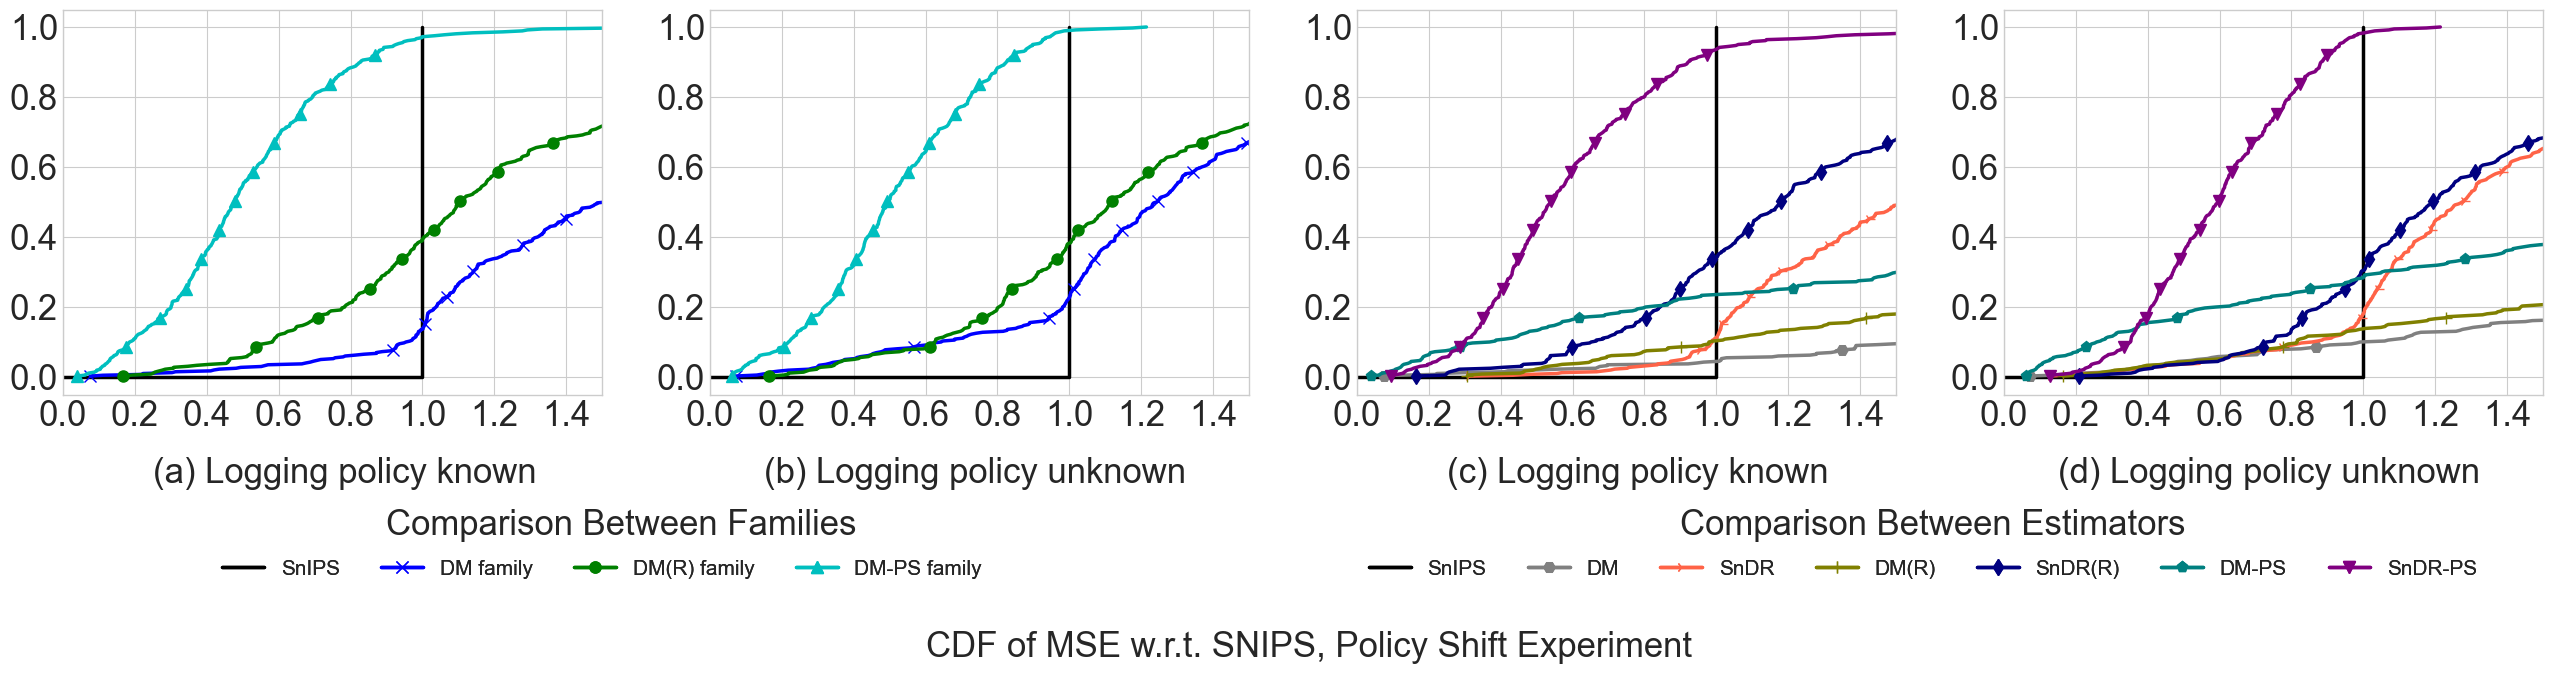

In [8]:
plot_ps(0,True)

['glass.csv', 'pen.csv', 'letter.csv', 'satimage.csv', 'yeast.csv', 'veh.csv', 'opt.csv', 'ecoli.csv', 'page.csv']
['glass.csv', 'pen.csv', 'letter.csv', 'satimage.csv', 'yeast.csv', 'veh.csv', 'opt.csv', 'ecoli.csv', 'page.csv']
['glass.csv', 'pen.csv', 'letter.csv', 'satimage.csv', 'yeast.csv', 'veh.csv', 'opt.csv', 'ecoli.csv', 'page.csv']
['glass.csv', 'pen.csv', 'letter.csv', 'satimage.csv', 'yeast.csv', 'veh.csv', 'opt.csv', 'ecoli.csv', 'page.csv']
['glass.csv', 'pen.csv', 'letter.csv', 'satimage.csv', 'yeast.csv', 'veh.csv', 'opt.csv', 'ecoli.csv', 'page.csv']
['glass.csv', 'pen.csv', 'letter.csv', 'satimage.csv', 'yeast.csv', 'veh.csv', 'opt.csv', 'ecoli.csv', 'page.csv']
['glass.csv', 'pen.csv', 'letter.csv', 'satimage.csv', 'yeast.csv', 'veh.csv', 'opt.csv', 'ecoli.csv', 'page.csv']
['glass.csv', 'pen.csv', 'letter.csv', 'satimage.csv', 'yeast.csv', 'veh.csv', 'opt.csv', 'ecoli.csv', 'page.csv']
['glass.csv', 'pen.csv', 'letter.csv', 'satimage.csv', 'yeast.csv', 'veh.csv', '

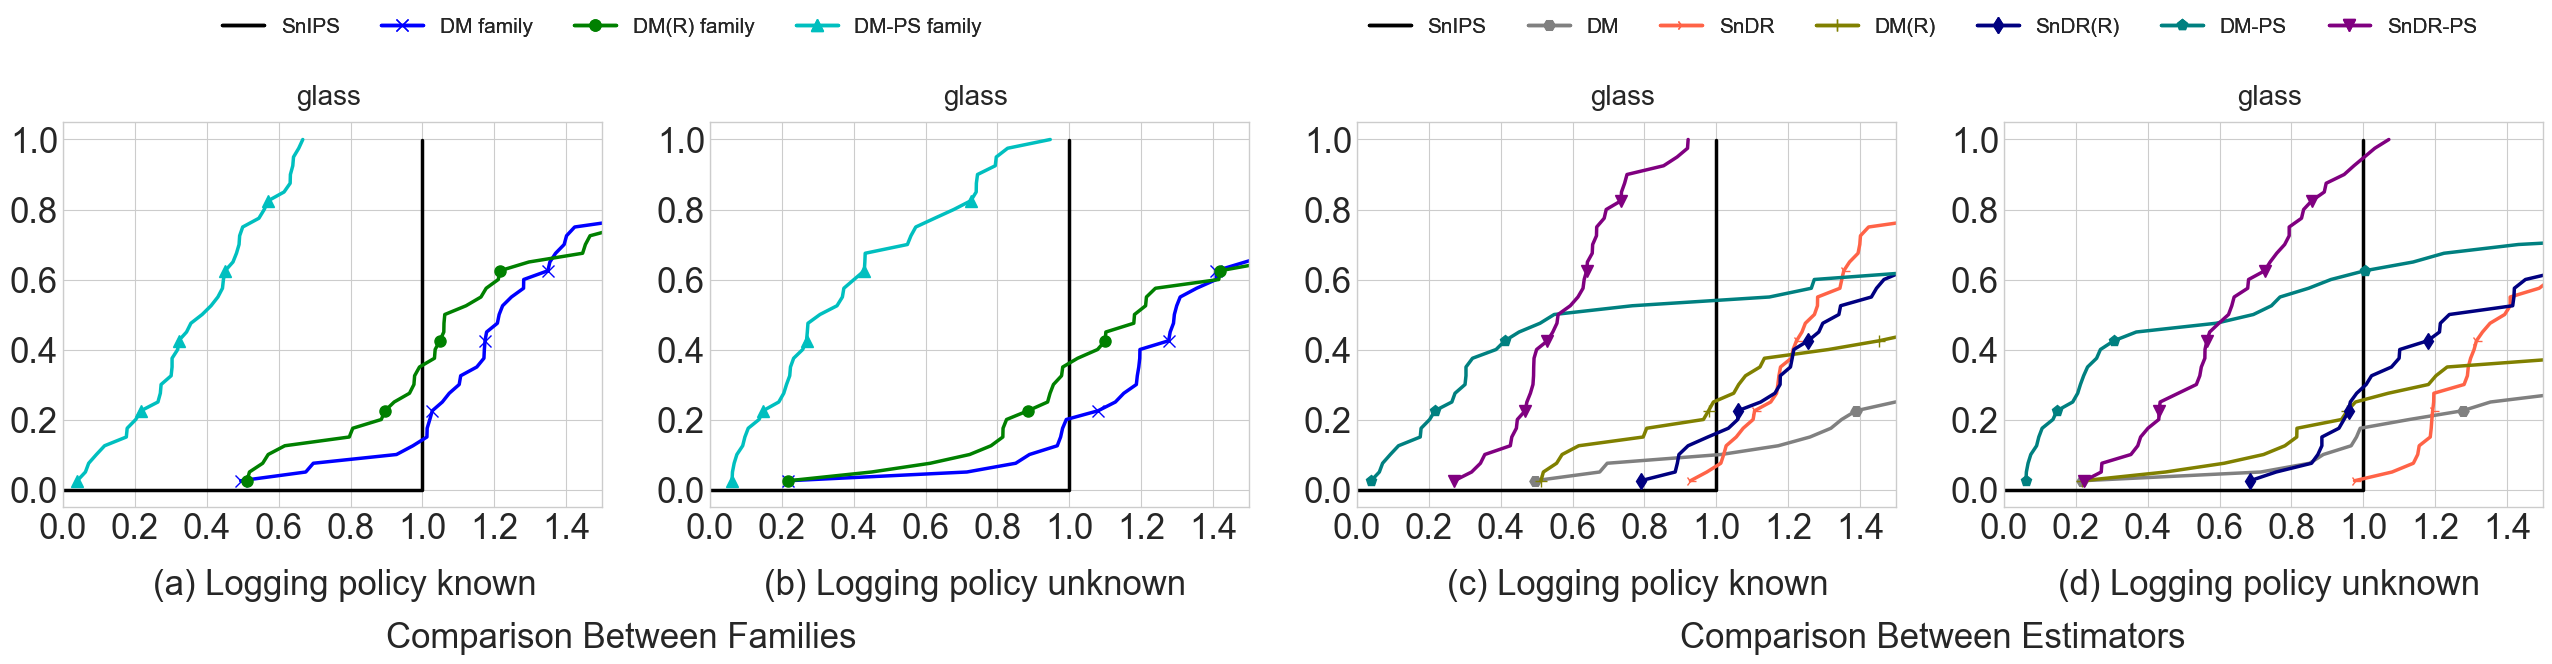

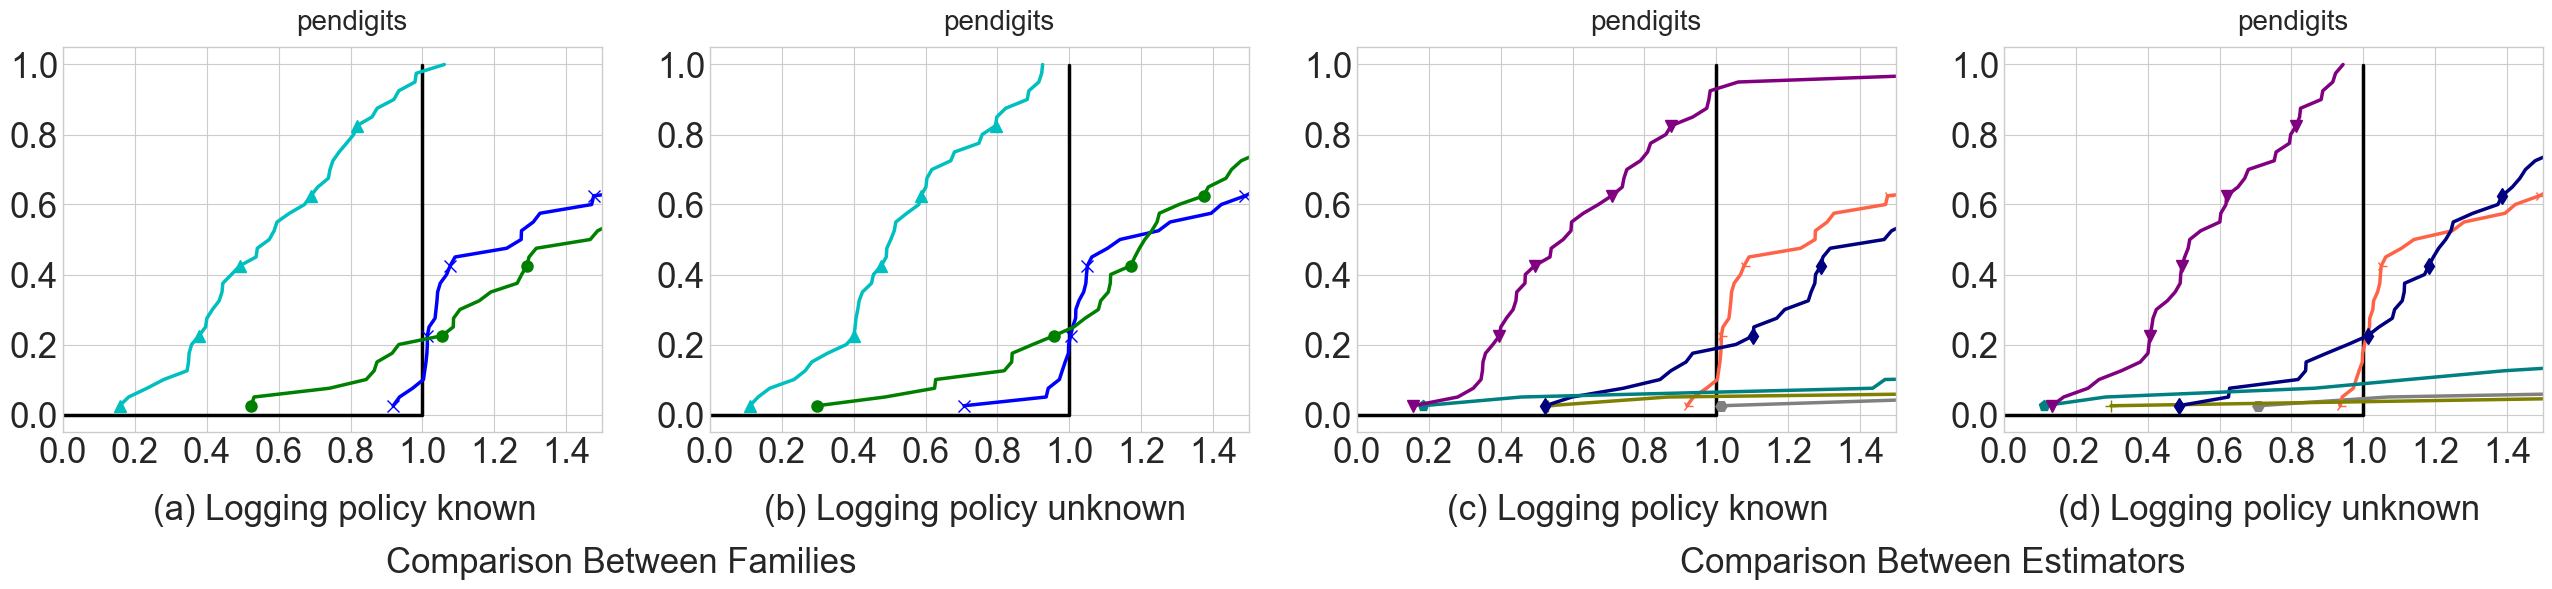

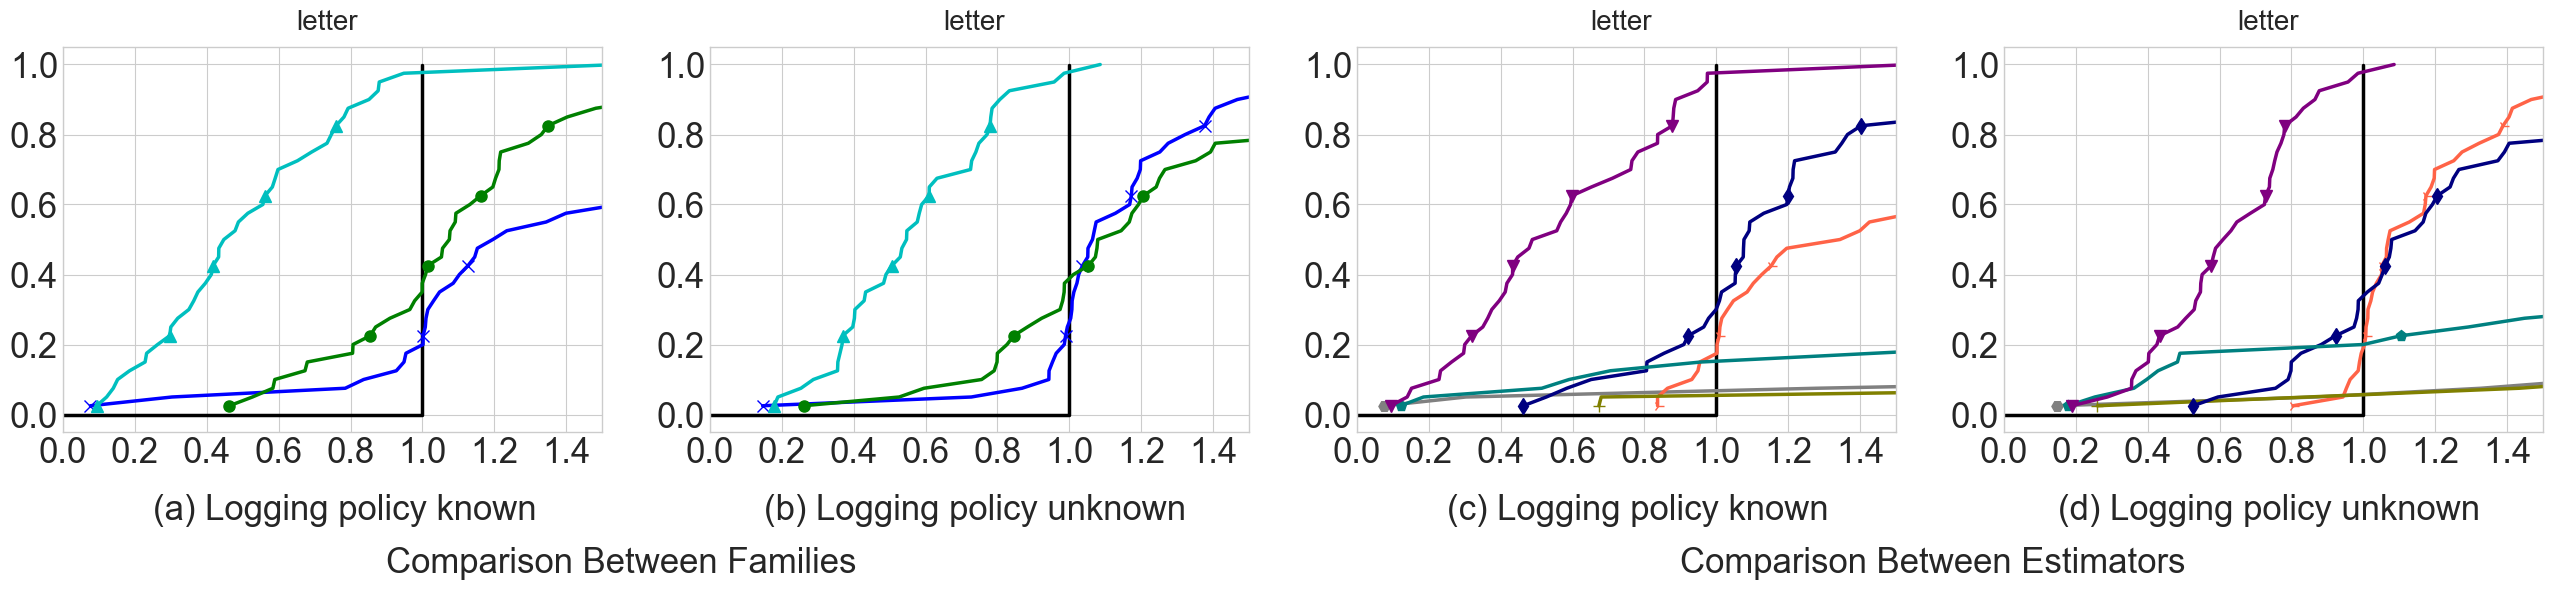

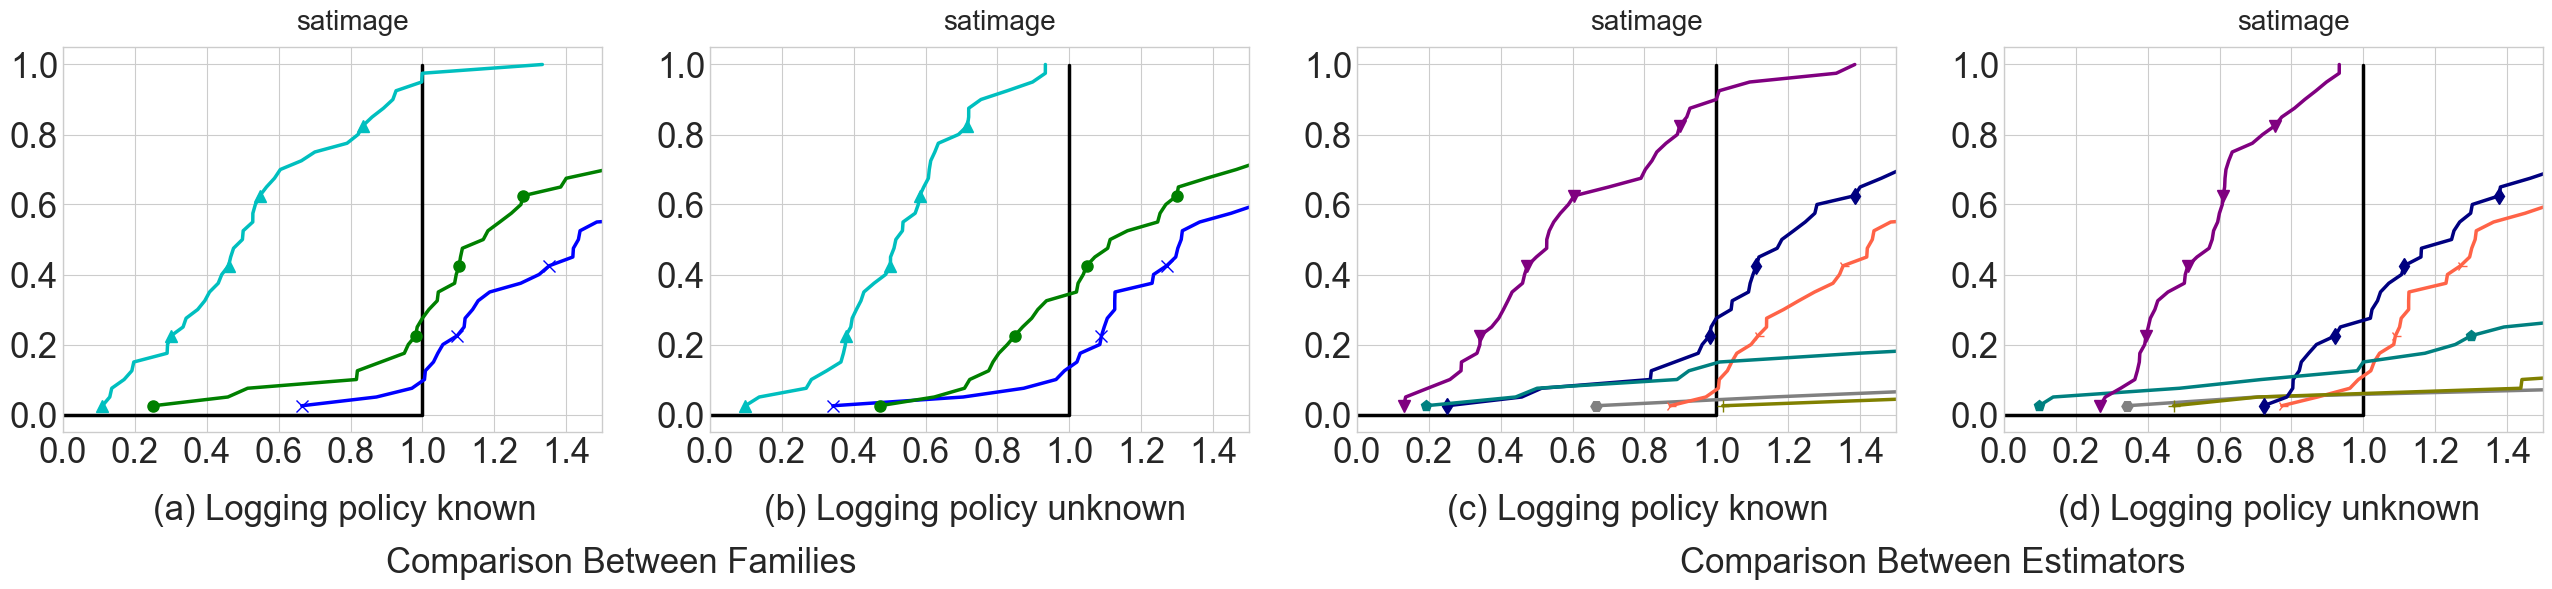

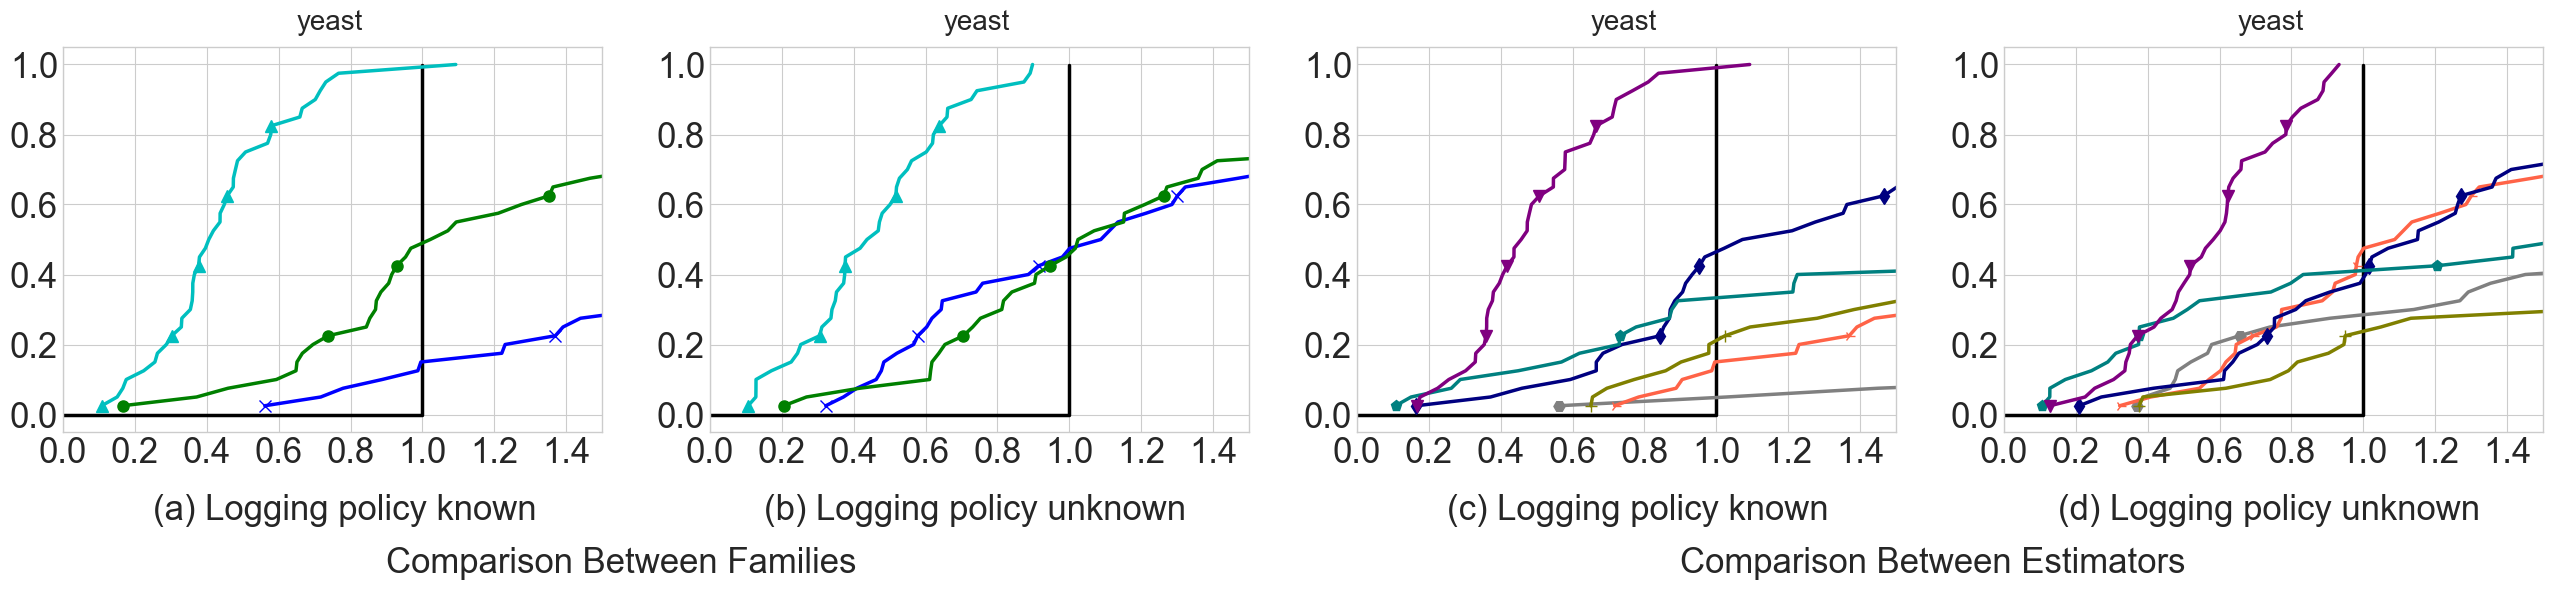

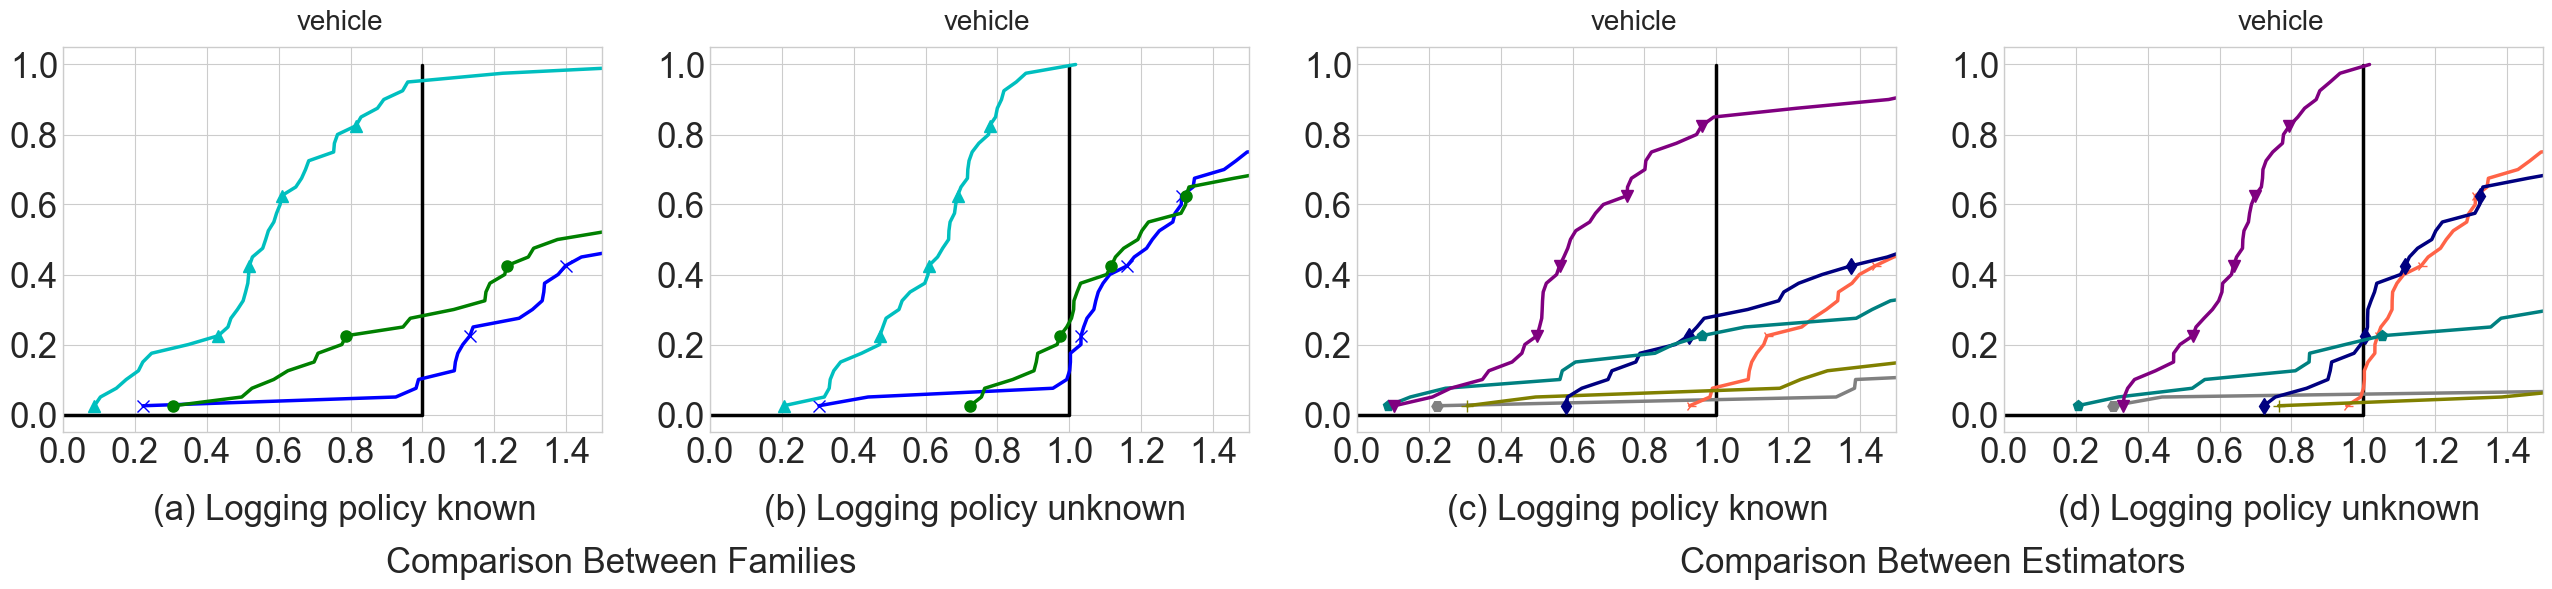

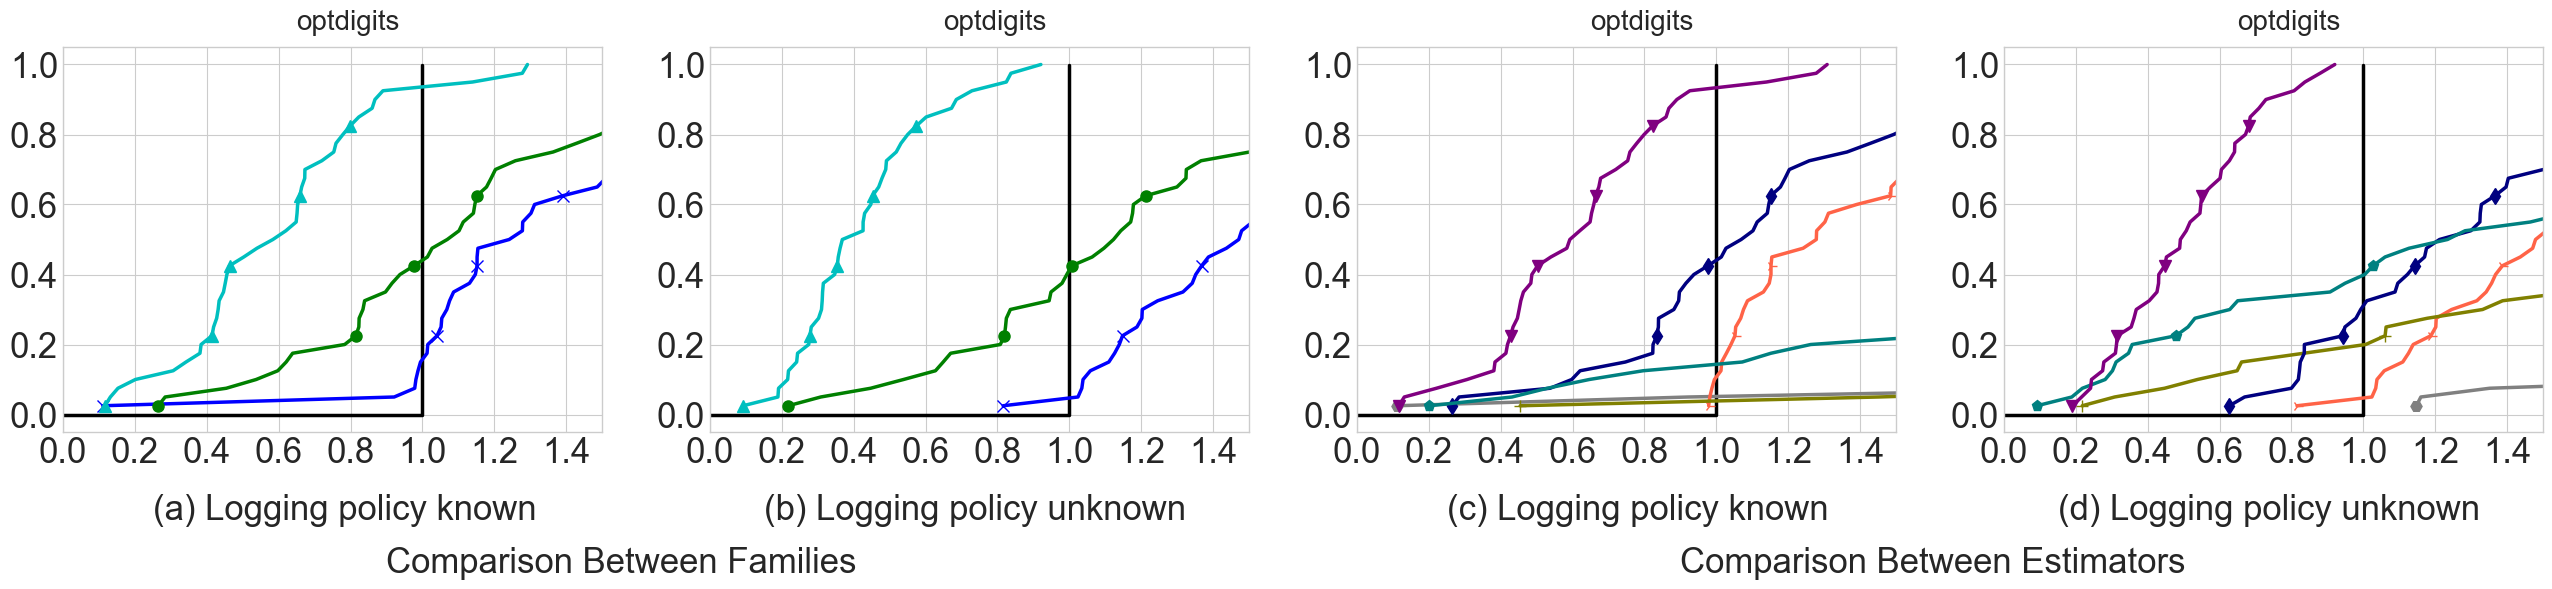

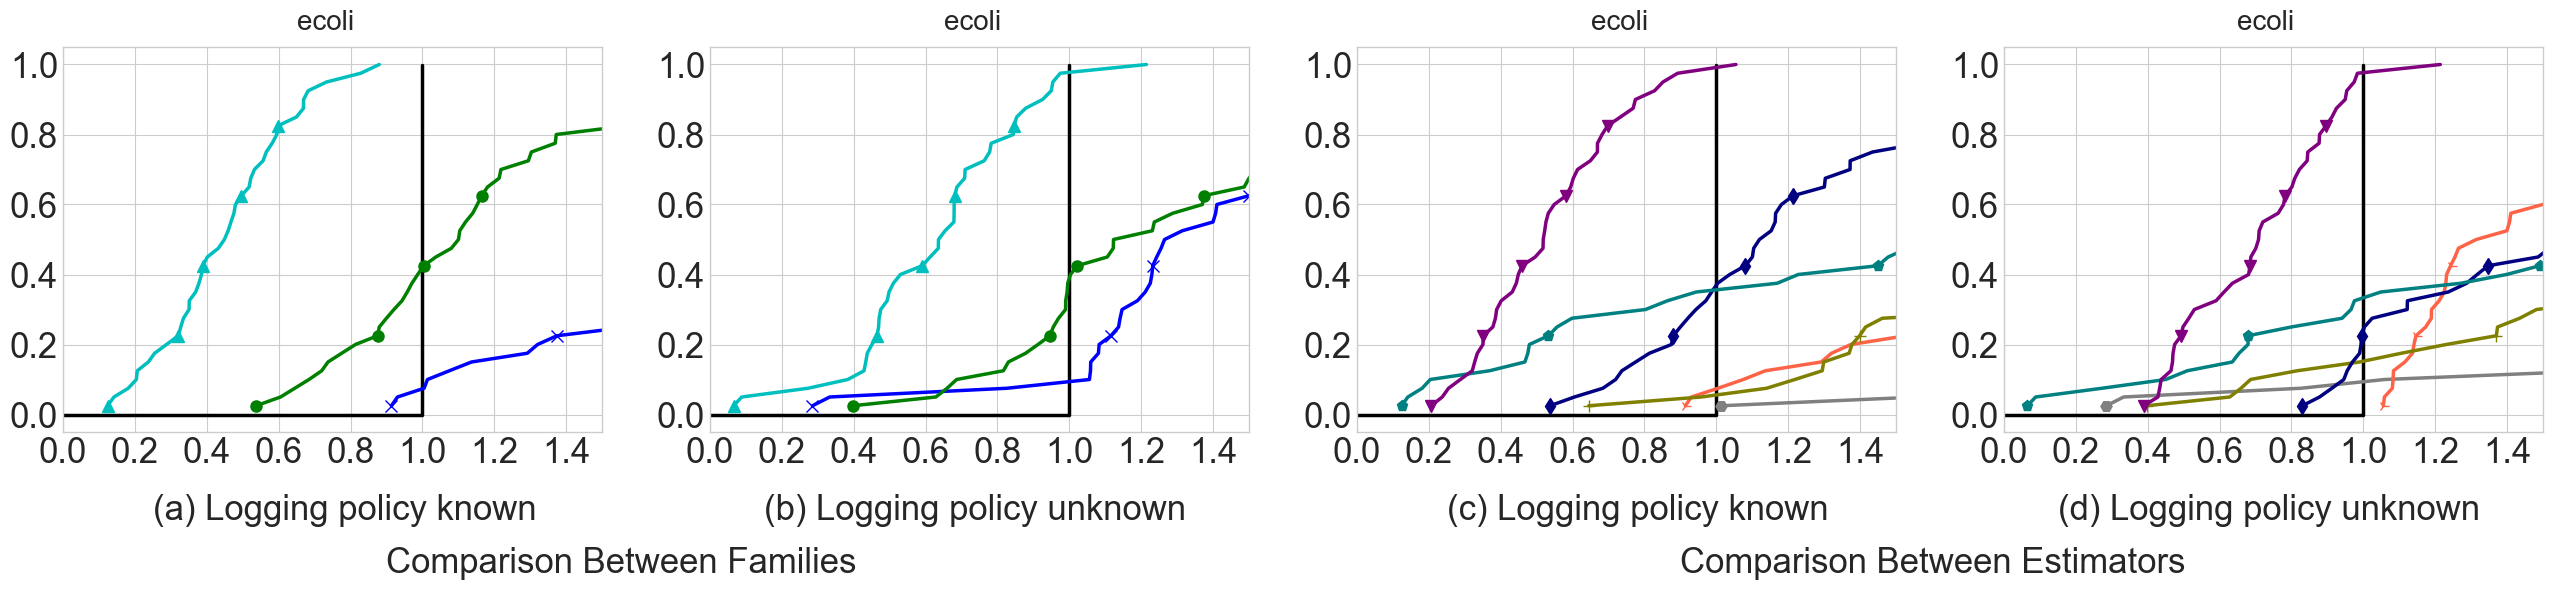

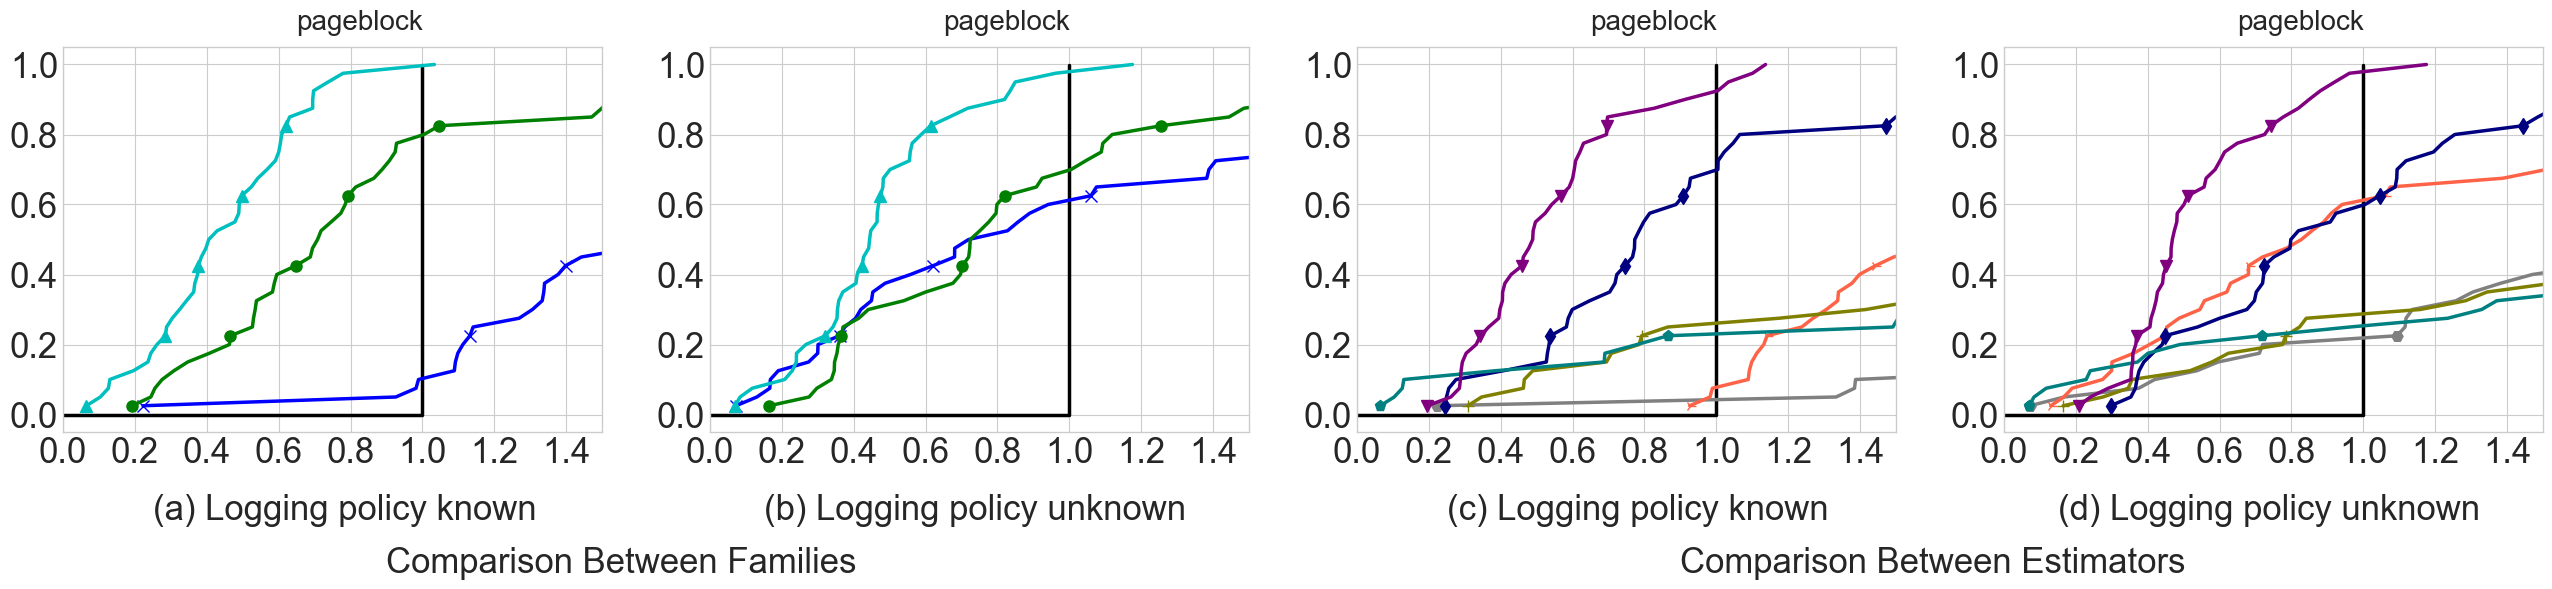

In [9]:
for k in range(9):
    if k == 0:
        plot_ps(0,True)
    else:
        plot_ps(k,False)